<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/FYP/blob/main/HealthMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Long Short Term Memory

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = LSTM(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
36/36 [==============================] - 22s 441ms/step - loss: 0.6795 - accuracy: 0.4898 - val_loss: 0.6728 - val_accuracy: 0.5476
Epoch 2/40
36/36 [==============================] - 15s 430ms/step - loss: 0.6681 - accuracy: 0.5404 - val_loss: 0.6616 - val_accuracy: 0.6111
Epoch 3/40
36/36 [==============================] - 15s 431ms/step - loss: 0.6589 - accuracy: 0.6027 - val_loss: 0.6502 - val_accuracy: 0.6508
Epoch 4/40
36/36 [==============================] - 15s 430ms/step - loss: 0.6452 - accuracy: 0.6524 - val_loss: 0.6375 - val_accuracy: 0.6905
Epoch 5/40
36/36 [==============================] - 16s 448ms/step - loss: 0.6338 - accuracy: 0.6702 - val_loss: 0.6226 - val_accuracy: 0.6905
Epoch 6/40
36/36 [==============================] - 15s 422ms/step - loss: 0.6197 - accuracy: 0.6853 - val_loss: 0.6070 - val_accuracy: 0.6984
Epoch 7/40
36/36 [==============================] - 15s 426ms/step - loss: 0.6065 - accuracy: 0.6898 - val_loss: 0.5903 - val_accuracy: 0.6905

###Training Accuracy = 97.16% and Test Accuracy = 99.28% for 40 epochs

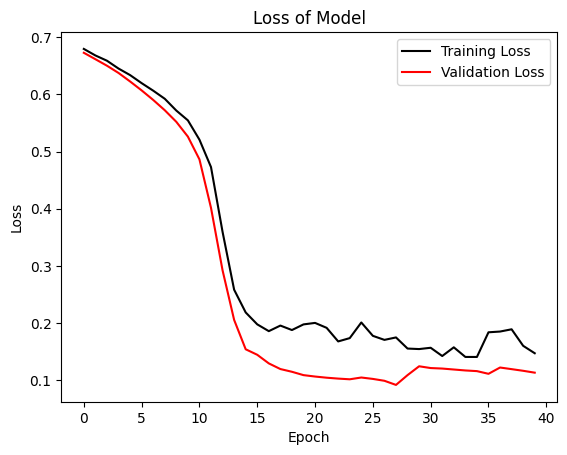

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Using Simple Recurrent Neural Network

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')
data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = SimpleRNN(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping =tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.01,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=60,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/60
36/36 [==============================] - 12s 245ms/step - loss: 0.7243 - accuracy: 0.4978 - val_loss: 0.7161 - val_accuracy: 0.3889
Epoch 2/60
36/36 [==============================] - 9s 252ms/step - loss: 0.7239 - accuracy: 0.4960 - val_loss: 0.7111 - val_accuracy: 0.4286
Epoch 3/60
36/36 [==============================] - 8s 236ms/step - loss: 0.7406 - accuracy: 0.4702 - val_loss: 0.7064 - val_accuracy: 0.4841
Epoch 4/60
36/36 [==============================] - 8s 210ms/step - loss: 0.6899 - accuracy: 0.5529 - val_loss: 0.7022 - val_accuracy: 0.5159
Epoch 5/60
36/36 [==============================] - 4s 108ms/step - loss: 0.7163 - accuracy: 0.5102 - val_loss: 0.6982 - val_accuracy: 0.5238
Epoch 6/60
36/36 [==============================] - 4s 106ms/step - loss: 0.7184 - accuracy: 0.5031 - val_loss: 0.6938 - val_accuracy: 0.5238
Epoch 7/60
36/36 [==============================] - 5s 143ms/step - loss: 0.7155 - accuracy: 0.5191 - val_loss: 0.6897 - val_accuracy: 0.5238
Epoch

###Training Accuracy = 82.5% and Test Accuracy = 87.05% for 60 epochs

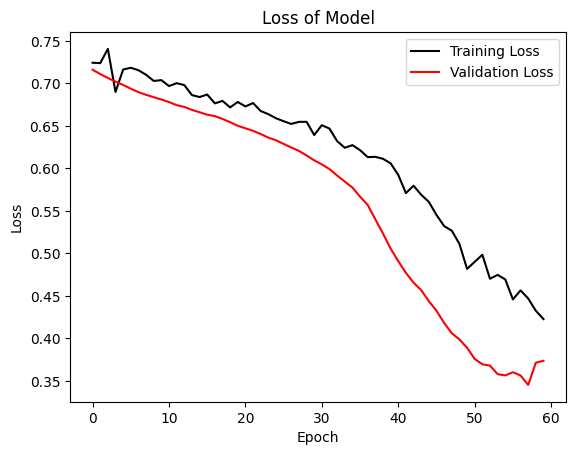

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Using Gated Recurrent Unit

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val.strip(',')) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = GRU(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
36/36 [==============================] - 19s 381ms/step - loss: 0.6740 - accuracy: 0.5849 - val_loss: 0.6690 - val_accuracy: 0.6270
Epoch 2/40
36/36 [==============================] - 13s 365ms/step - loss: 0.6703 - accuracy: 0.5609 - val_loss: 0.6601 - val_accuracy: 0.6825
Epoch 3/40
36/36 [==============================] - 13s 366ms/step - loss: 0.6571 - accuracy: 0.6240 - val_loss: 0.6518 - val_accuracy: 0.6984
Epoch 4/40
36/36 [==============================] - 13s 368ms/step - loss: 0.6555 - accuracy: 0.6276 - val_loss: 0.6439 - val_accuracy: 0.7222
Epoch 5/40
36/36 [==============================] - 13s 371ms/step - loss: 0.6446 - accuracy: 0.6267 - val_loss: 0.6358 - val_accuracy: 0.7381
Epoch 6/40
36/36 [==============================] - 13s 370ms/step - loss: 0.6313 - accuracy: 0.6907 - val_loss: 0.6276 - val_accuracy: 0.7302
Epoch 7/40
36/36 [==============================] - 14s 377ms/step - loss: 0.6238 - accuracy: 0.7004 - val_loss: 0.6188 - val_accuracy: 0.7381

###Training Accuracy = 94.58% and Test Accuracy = 93.53% for 40 epochs

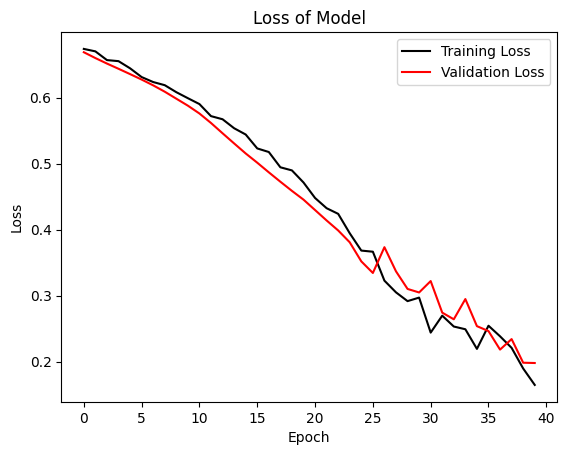

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Sample classification report generation

In [ ]:
y_pred = model.predict(X_train_scaled).round().astype(int)

40/40 [==============================] - 4s 87ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       634
           1       0.97      0.95      0.96       617

    accuracy                           0.96      1251
   macro avg       0.96      0.96      0.96      1251
weighted avg       0.96      0.96      0.96      1251

